In [1]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error
from pandas_profiling import ProfileReport
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_confusion_matrix
from sklearn import tree
import math
import warnings
import os
import plotly.graph_objects as go
import plotly.offline as po
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import random
import plotly.figure_factory as ff
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import iplot
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning:

The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.



In [2]:
df = pd.read_csv('../input/diabetes-health-indicators-dataset/diabetes_binary_health_indicators_BRFSS2015.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [4]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [5]:
# Checking duplicates

duplicate = df[df.duplicated()]
print("Duplicate Rows : ",len(duplicate))
duplicate

Duplicate Rows :  24206


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
1242,1.0,1.0,1.0,1.0,27.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,0.0,30.0,1.0,0.0,10.0,4.0,5.0
1563,0.0,0.0,0.0,1.0,21.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
2700,0.0,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0
3160,0.0,0.0,0.0,1.0,21.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
3332,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253492,1.0,1.0,1.0,1.0,33.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,9.0,6.0,6.0
253550,0.0,0.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0,6.0,8.0
253563,0.0,0.0,1.0,1.0,24.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,6.0,8.0
253597,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0


In [6]:
# Removing duplicate rows from the dataset
df.drop_duplicates(inplace = True)

In [7]:
duplicate = df[df.duplicated()]
print("Duplicate Rows : ", len(duplicate))

Duplicate Rows :  0


In [8]:
# in our dataset the label is diabetes column
# This will return the label distribution count 
df['Diabetes_binary'].value_counts()

0.0    194377
1.0     35097
Name: Diabetes_binary, dtype: int64

In [9]:
df.shape

(229474, 22)

<AxesSubplot:xlabel='Diabetes_binary', ylabel='count'>

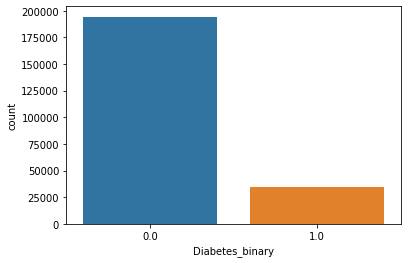

In [10]:
# plotting the label distribution
sns.countplot(df['Diabetes_binary'])

In [11]:
X = df.drop('Diabetes_binary', axis = 1) # features
y = df[['Diabetes_binary']] # labels

# splitting the features and labels into train and test with test size = 20% and train size = 80%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [12]:
# Initializing the model
model = RandomForestClassifier(n_estimators = 300, 
                               criterion = 'entropy',
                               min_samples_split=10, 
                               random_state=0)
# fitting the model on the train data
model.fit(X_train, y_train)
# predicting values on test data
y_pred = model.predict(X_test)

In [13]:
# Creating a new dataframe with true and predicted values
df_pred = pd.DataFrame()
df_pred['True values'] = y_test
df_pred['Predicted values'] = y_pred
df_pred

,True values,Predicted values
194499,0.0,0.0
107401,0.0,0.0
16210,0.0,0.0
127385,1.0,0.0
162339,0.0,0.0
...,...,...
180134,0.0,0.0
130054,0.0,0.0
233177,0.0,0.0
209982,1.0,0.0


In [14]:
# Evaluation

# calculating the accuracy of the model
acc = {}
accuracy = accuracy_score(y_test, y_pred)
acc['Random Forest Classifier'] = accuracy

# calculating the classification report 
clfreport = classification_report(y_test, y_pred) 

# calculating the mse 
mse = mean_squared_error(y_test, y_pred)

# calculating the rmse 
rmse = math.sqrt(mse)
print('\nAccuracy score of Random Forest Classifier : ' + str(round(accuracy*100, 2))+'%')
print("\n"+"_"*50)
print('\nClassification_report : ')
print(clfreport)
print("\n"+"_"*50)
print('\nMean squared error : '+ str(mse))
print("\n"+"_"*50)
print('\nRoot mean squared error : '+ str(rmse))


Accuracy score of Random Forest Classifier : 85.3%

__________________________________________________

Classification_report : 
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     38895
         1.0       0.57      0.15      0.24      7000

    accuracy                           0.85     45895
   macro avg       0.72      0.56      0.58     45895
weighted avg       0.82      0.85      0.81     45895


__________________________________________________

Mean squared error : 0.1469659004248829

__________________________________________________

Root mean squared error : 0.38336131837325854


# **Oversampling**

**SMOTE method**

In [15]:
from imblearn.over_sampling import SMOTE
# auto resampling. The strategy can be changed as required.
sm = SMOTE(sampling_strategy='auto', random_state=42)
# Fit the model to generate the data.
oversampled_X, oversampled_Y = sm.fit_resample(df.drop('Diabetes_binary', axis=1), df['Diabetes_binary'])
oversampled = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

<AxesSubplot:xlabel='Diabetes_binary', ylabel='count'>

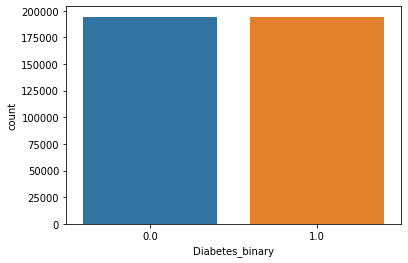

In [16]:
sns.countplot(oversampled['Diabetes_binary'])

In [17]:
X1 = oversampled.drop('Diabetes_binary', axis = 1) #features
y1 = oversampled[['Diabetes_binary']] #labels

# splitting the features and labels into train and test with test size = 20% and train size = 80%
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=10)

In [18]:
# Initializing the model
model1 = RandomForestClassifier(n_estimators = 300, 
                                 criterion = 'entropy',
                                 min_samples_split=10, 
                                 random_state=0)
# fitting the model on the train data
model1.fit(X1_train, y1_train)
# predicting values on test data
y_pred1 = model1.predict(X1_test)

In [19]:
# Creating a new dataframe with true and predicted values
df_pred1 = pd.DataFrame()
df_pred1['True values'] = y1_test
df_pred1['Predicted values'] = y_pred1
df_pred1

,True values,Predicted values
254036,1.0,1.0
44602,0.0,0.0
273742,1.0,1.0
242614,1.0,1.0
258892,1.0,1.0
...,...,...
369226,1.0,1.0
109960,0.0,0.0
131412,0.0,0.0
74134,0.0,0.0


In [20]:
# Evaluation

# calculating the accuracy of the model
acc1 = {}
accuracy1 = accuracy_score(y1_test, y_pred1)
acc1['Random Forest Classifier'] = accuracy1

# calculating the classification report 
clfreport1 = classification_report(y1_test, y_pred1) 

# calculating the mse 
mse1 = mean_squared_error(y1_test, y_pred1)

# calculating the rmse 
rmse1 = math.sqrt(mse1)
print('\nAccuracy score of Random Forest Classifier : ' + str(round(accuracy1*100, 2))+'%')
print("\n"+"_"*50)
print('\nClassification_report : ')
print(clfreport1)
print("\n"+"_"*50)
print('\nMean squared error : '+ str(mse1))
print("\n"+"_"*50)
print('\nRoot mean squared error : '+ str(rmse1))


Accuracy score of Random Forest Classifier : 91.25%

__________________________________________________

Classification_report : 
              precision    recall  f1-score   support

         0.0       0.87      0.96      0.92     39018
         1.0       0.96      0.86      0.91     38733

    accuracy                           0.91     77751
   macro avg       0.92      0.91      0.91     77751
weighted avg       0.92      0.91      0.91     77751


__________________________________________________

Mean squared error : 0.08745868220344433

__________________________________________________

Root mean squared error : 0.2957341410852733
